In [158]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.rc('font', size=12)

In [159]:
df = pd.read_csv("data.csv")
df

,lambda,n,r_light,r_dark
0,706,1,1.00,1.07
1,706,2,1.15,1.25
2,706,3,1.35,1.40
3,706,4,1.50,1.55
4,706,5,1.60,1.65
5,434,1,0.99,1.08
6,434,2,1.18,1.22
7,434,3,1.32,1.36
8,434,4,1.41,1.46
9,434,5,1.47,1.50


In [160]:
df['lambda'] = df['lambda'] * 10**-9
df['r_light'] = df['r_light'] * 5 * 10**-4
df['r_dark'] = df['r_dark'] * 5 * 10**-4

In [161]:
gdf = df.groupby("lambda")

In [162]:
koefs_light = {}
koefs_dark = {}

for wave in np.unique(df['lambda']):
    temp = gdf.get_group(wave)
    x = temp['n']
    y_dark = temp['r_dark'] ** 2
    y_light = temp['r_light'] ** 2
    basis = np.vstack((x,np.ones(len(x)))).T
    koefs_dark[wave] = scipy.linalg.lstsq(basis, y_dark)[0]
    koefs_light[wave] = scipy.linalg.lstsq(basis, y_light)[0]

print(koefs_light)
print(koefs_dark)

{4.3400000000000005e-07: array([7.393250e-08, 1.913975e-07]), 5.46e-07: array([7.53150e-08, 1.54305e-07]), 6.56e-07: array([8.89700e-08, 1.74475e-07]), 7.06e-07: array([1.011875e-07, 1.441875e-07])}
{4.3400000000000005e-07: array([7.0260e-08, 2.3352e-07]), 5.46e-07: array([7.49350e-08, 1.94395e-07]), 6.56e-07: array([8.214750e-08, 2.371675e-07]), 7.06e-07: array([9.9880e-08, 1.8998e-07])}


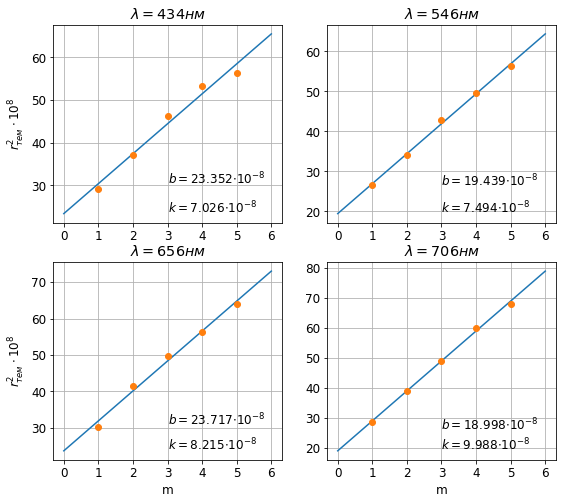

In [163]:
figs, axs = plt.subplots(2, 2, figsize=(9,8))

column = 0
row = 0
for wave in np.unique(df['lambda']):
    temp = gdf.get_group(wave)
    x0 = temp['n']
    y0 = temp['r_dark'] ** 2 * 10**8

    x = np.arange(0, 6, 0.0001)
    y = koefs_dark[wave][0] * x * 10**8 + koefs_dark[wave][1] * 10**8   

    axs[row, column].grid()
    axs[row, column].set_xticks(np.arange(0,7,1), minor=False)

    axs[row,column].set_title(fr"$\lambda = {int(wave*10**9)} нм$")
    axs[row, column].plot(x, y)
    axs[row, column].plot(x0, y0, 'o')
    
    axs[row, column].text(3, np.min(y) + 0.1, r"$k = $" + str(np.round(koefs_dark[wave][0] * 10**8, 3)) + r"$\cdot 10^{-8}$" )
    axs[row, column].text(3, np.min(y) + 7, r"$b = $" + str(np.round(koefs_dark[wave][1] * 10**8, 3)) + r"$\cdot 10^{-8}$" )

    column = (column + 1)%2
    if column is 0:
        row += 1

axs[0, 0].set(ylabel = r"$r^2_{тем} \cdot 10^{8}$")
axs[0, 1].set(xlabel = "", ylabel="")
axs[1, 0].set(xlabel = "m", ylabel = r"$r^2_{тем} \cdot 10^{8}$")
axs[1, 1].set(xlabel = "m", ylabel="")

plt.savefig(f"report/assets/r_dark(m).pdf" )

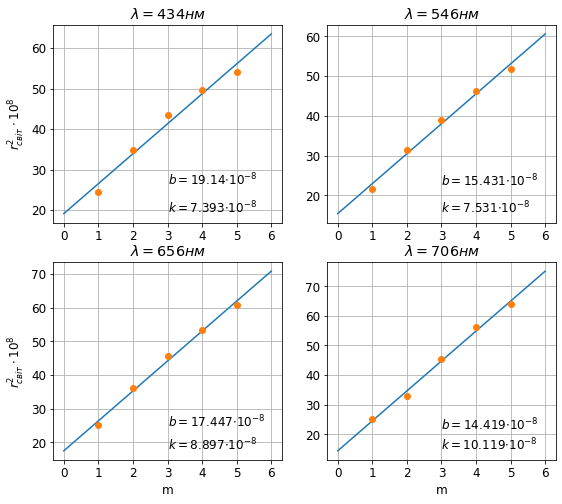

In [164]:
figs, axs = plt.subplots(2, 2, figsize=(9,8))

column = 0
row = 0
for wave in np.unique(df['lambda']):
    temp = gdf.get_group(wave)
    x0 = temp['n']
    y0 = temp['r_light'] ** 2 * 10**8

    x = np.arange(0, 6, 0.0001)
    y = koefs_light[wave][0] * x * 10**8 + koefs_light[wave][1] * 10**8  

    axs[row, column].grid()
    axs[row, column].set_xticks(np.arange(0,7,1), minor=False)

    axs[row,column].set_title(fr"$\lambda = {int(wave*10**9)} нм$")
    axs[row, column].plot(x, y)
    axs[row, column].plot(x0, y0, 'o')
    
    axs[row, column].text(3, np.min(y) + 0.1, r"$k = $" + str(np.round(koefs_light[wave][0] * 10**8, 3)) + r"$\cdot 10^{-8}$" )
    axs[row, column].text(3, np.min(y) + 7, r"$b = $" + str(np.round(koefs_light[wave][1] * 10**8, 3)) + r"$\cdot 10^{-8}$" )

    column = (column + 1)%2
    if column is 0:
        row += 1

axs[0, 0].set(ylabel = r"$r^2_{світ} \cdot 10^{8}$")
axs[0, 1].set(xlabel = "", ylabel="")
axs[1, 0].set(xlabel = "m", ylabel = r"$r^2_{світ} \cdot 10^{8}$")
axs[1, 1].set(xlabel = "m", ylabel="")

plt.savefig(f"report/assets/r_light(m).pdf" )

In [165]:
R = {}
R_dark = {}
R_light = {}
d0 = {}
d0_dark = {}
d0_light = {}
d = {}

for wave in np.unique(df['lambda']):
    R_dark[wave] = koefs_dark[wave][0] / wave
    R_light[wave] = koefs_light[wave][0] / wave
    R[wave] = np.mean([R_dark[wave], R_light[wave]])

    d0_dark[wave] = - (koefs_dark[wave][1] * wave) / ( 2 * koefs_dark[wave][0])
    d0_light[wave] = - (wave / 4 + koefs_light[wave][1] / ( 2 * R_light[wave]))
    d0[wave] = np.mean([d0_dark[wave], d0_light[wave]])
    d[wave] = 2 * np.sqrt(-2*R[wave]*d0[wave] - d0[wave]**2)

print(R_dark)
print(R_light)
print(R)
print(d0_dark)
print(d0_light)
print(d0)
print(d)

{4.3400000000000005e-07: 0.1618894009216589, 5.46e-07: 0.13724358974358977, 6.56e-07: 0.1252248475609756, 7.06e-07: 0.14147308781869683}
{4.3400000000000005e-07: 0.17035138248847928, 5.46e-07: 0.1379395604395604, 6.56e-07: 0.13562500000000008, 7.06e-07: 0.14332507082152973}
{4.3400000000000005e-07: 0.1661203917050691, 5.46e-07: 0.1375915750915751, 6.56e-07: 0.13042492378048784, 7.06e-07: 0.14239907932011328}
{4.3400000000000005e-07: -7.212331340734424e-07, 5.46e-07: -7.082115833722557e-07, 6.56e-07: -9.469666149304607e-07, 7.06e-07: -6.714351221465762e-07}
{4.3400000000000005e-07: -6.702726642545564e-07, 5.46e-07: -6.958210515833505e-07, 6.56e-07: -8.072258064516121e-07, 7.06e-07: -6.795086473131566e-07}
{4.3400000000000005e-07: -6.957528991639994e-07, 5.46e-07: -7.02016317477803e-07, 6.56e-07: -8.770962106910364e-07, 7.06e-07: -6.754718847298664e-07}
{4.3400000000000005e-07: 0.0009615757987928469, 5.46e-07: 0.000879050781005526, 6.56e-07: 0.0009566392079719573, 7.06e-07: 0.00087720623

In [166]:
df['R_dark'] = df['lambda'].map(R_dark)
df['R_light'] = df['lambda'].map(R_light)
df['R'] = df['lambda'].map(R)
df['d0_dark'] = df['lambda'].map(d0_dark)
df['d0_light'] = df['lambda'].map(d0_light)
df['d0'] = df['lambda'].map(d0)
df['d'] = df['lambda'].map(d)

In [167]:
df.groupby('lambda').mean()

,n,r_light,r_dark,R_dark,R_light,R,d0_dark,d0_light,d0,d
lambda,,,,,,,,,,
4.340000e-07,3,0.000637,0.000662,0.161889,0.170351,0.166120,-7.212331e-07,-6.702727e-07,-6.957529e-07,0.000962
5.460000e-07,3,0.000610,0.000642,0.137244,0.137940,0.137592,-7.082116e-07,-6.958211e-07,-7.020163e-07,0.000879
6.560000e-07,3,0.000657,0.000690,0.125225,0.135625,0.130425,-9.469666e-07,-8.072258e-07,-8.770962e-07,0.000957
7.060000e-07,3,0.000660,0.000692,0.141473,0.143325,0.142399,-6.714351e-07,-6.795086e-07,-6.754719e-07,0.000877


In [176]:
d_light = {}
d_dark = {}

for wave in np.unique(df['lambda']):
    Dyy = np.var(gdf.get_group(wave)['r_light']**2)
    Dxx = np.var(gdf.get_group(wave)['n']**2)
    k2 = np.abs(koefs_light[wave][0]) **2
    d_light[wave] = np.sqrt(np.abs(Dyy / Dxx - k2)/3) / wave

for wave in np.unique(df['lambda']):
    Dyy = np.var(gdf.get_group(wave)['r_dark']**2)
    Dxx = np.var(gdf.get_group(wave)['n']**2)
    k2 = np.abs(koefs_dark[wave][0]) **2
    d_dark[wave] = np.sqrt(np.abs(Dyy / Dxx - k2)/3) / wave


df['e_dark'] = df['lambda'].map(d_dark)
df['e_light'] = df['lambda'].map(d_light)

In [177]:
df['eR'] = np.sqrt((df.e_dark ** 2 + df.e_light ** 2)/2)
df['epsilonR'] = df.eR / df.R * 100
df

,lambda,n,r_light,r_dark,R_dark,R_light,R,d0_dark,d0_light,d0,d,e_dark,e_light,eR,epsilonR
0,7.060000e-07,1,0.000500,0.000535,0.141473,0.143325,0.142399,-6.714351e-07,-6.795086e-07,-6.754719e-07,0.000877,0.080578,0.081628,0.081105,56.955898
1,7.060000e-07,2,0.000575,0.000625,0.141473,0.143325,0.142399,-6.714351e-07,-6.795086e-07,-6.754719e-07,0.000877,0.080578,0.081628,0.081105,56.955898
2,7.060000e-07,3,0.000675,0.000700,0.141473,0.143325,0.142399,-6.714351e-07,-6.795086e-07,-6.754719e-07,0.000877,0.080578,0.081628,0.081105,56.955898
3,7.060000e-07,4,0.000750,0.000775,0.141473,0.143325,0.142399,-6.714351e-07,-6.795086e-07,-6.754719e-07,0.000877,0.080578,0.081628,0.081105,56.955898
4,7.060000e-07,5,0.000800,0.000825,0.141473,0.143325,0.142399,-6.714351e-07,-6.795086e-07,-6.754719e-07,0.000877,0.080578,0.081628,0.081105,56.955898
5,4.340000e-07,1,0.000495,0.000540,0.161889,0.170351,0.166120,-7.212331e-07,-6.702727e-07,-6.957529e-07,0.000962,0.092175,0.096991,0.094614,56.955048
6,4.340000e-07,2,0.000590,0.000610,0.161889,0.170351,0.166120,-7.212331e-07,-6.702727e-07,-6.957529e-07,0.000962,0.092175,0.096991,0.094614,56.955048
7,4.340000e-07,3,0.000660,0.000680,0.161889,0.170351,0.166120,-7.212331e-07,-6.702727e-07,-6.957529e-07,0.000962,0.092175,0.096991,0.094614,56.955048
8,4.340000e-07,4,0.000705,0.000730,0.161889,0.170351,0.166120,-7.212331e-07,-6.702727e-07,-6.957529e-07,0.000962,0.092175,0.096991,0.094614,56.955048
9,4.340000e-07,5,0.000735,0.000750,0.161889,0.170351,0.166120,-7.212331e-07,-6.702727e-07,-6.957529e-07,0.000962,0.092175,0.096991,0.094614,56.955048
